# <center>ML Assignment 1</center>

### <center> Rathin Bhargava (IMT2017522), Brahma Kulkarni (IMT2017012), Vaishnavi Dhulipalla (IMT2017514) </center>

# 1. Introduction

* Importing all required libraries
* Reading dataset csv file into a Pandas dataframe
* Creating a list of the features we wish to consider for training
* initializing an dictionary, called 'get' that stores the means and standard deviations of elements of columns that we aren't excluding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import *
from math import *
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
df = pd.read_csv('Pima_Indian_diabetes.csv')
# s = "Pregnancies Glucose SkinThickness BloodPressure Insulin BMI DiabetesPedigreeFunction Age"
s = "Pregnancies Glucose Insulin SkinThickness BMI DiabetesPedigreeFunction Age BloodPressure"
feature = s.split()
# df.head()
get = {}
print(df.shape) #to view the dimensions of the dataset (rows, columns) 

(768, 9)


This stat function returns a tuple of mean and standard deviation of a given array

In [2]:
def stat(l):
    mean = sum(l)/len(l)
    sd = sqrt(sum([(x-mean)**2 for x in l])/len(l))
    return (mean,sd)

# 2. Missing Data Analysis

For every feature, we plot the frequency histogram to get a better idea of the data we are dealing with. We then decide what rows to include and what not to. We then calculate the mean and standard deviations of the non-excluded columns and store them in the 'get' dictionary. We may impute values for some columns if needed. That has been explained in the next section.

1. Pregnancies - We plan to exclude negative pregnancies as that simply doesn't make sense.

count    742.000000
mean       3.866601
std        3.479971
min       -5.412815
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

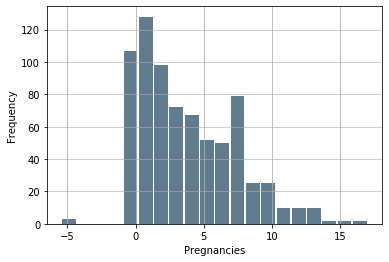

In [3]:
l = [x for x in df['Pregnancies'] if x >= 0]
get['Pregnancies'] = stat(l)


plot1 = df['Pregnancies']
plot1.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.xlabel('Pregnancies')
plt.grid(axis='y', alpha=0.75)

df['Pregnancies'].describe()
#replace missing values with median

Seeing the histogram, we have decided to impute missing values with the median as it doesn't seem to change the underlying distribution.

 2 . Glucose -  We plan to impute non-positive glucose values as they aren't practical

count    752.000000
mean     119.966097
std       32.367659
min        0.000000
25%       99.000000
50%      116.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64

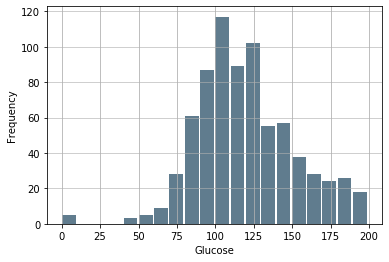

In [4]:
l = [x for x in df['Glucose'] if x > 0]
get['Glucose'] = stat(l)

plot1 = df['Glucose']
plot1.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.xlabel('Glucose')
plt.grid(axis='y', alpha=0.75)

df['Glucose'].describe()

#Above 200 is generally diabetic
#gaussian

As we can see from the histogram, the distribution is more or less a gaussian. Hence, we decided to impute missing values based on the corresponding gaussian.

3 . BloodPressure - We decide to impute the values less than 0 as they cannot be correct

count    768.000000
mean      68.886078
std       19.427448
min       -3.496455
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

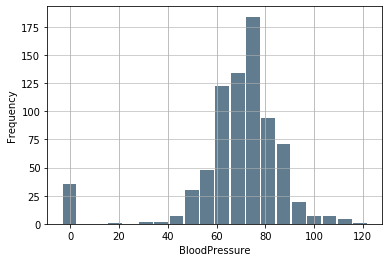

In [5]:
l = [x for x in df['BloodPressure'] if x > 0]
get['BloodPressure'] = stat(l)

plot1 = df['BloodPressure']
plot1.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.xlabel('BloodPressure')
plt.grid(axis='y', alpha=0.75)

df['BloodPressure'].describe()
#remove below 0

No imputation is required as there are no missing values.

4 . We plan to impute non-positive skin thickness values as the thickness of skin has to be more than zero

count    746.000000
mean      20.309879
std       15.974523
min      -11.945520
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

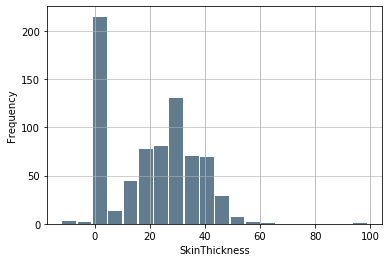

In [6]:
l = [x for x in df['SkinThickness'] if x > 0]
get['SkinThickness'] = stat(l)

plot1 = df['SkinThickness']
plot1.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.xlabel('SkinThickness')
plt.grid(axis='y', alpha=0.75)

df['SkinThickness'].describe()
#remove below zero, keep 0
#gaussian

As we can see from the histogram, the distribution is more or less a gaussian. Hence, we decided to impute missing values based on the corresponding gaussian

5 . We plan to impute non-positive insulin readings as they just cannot be correct

,0
count,394.000000
mean,155.548223
std,118.775855
min,14.000000
25%,76.250000
50%,125.000000
75%,190.000000
max,846.000000


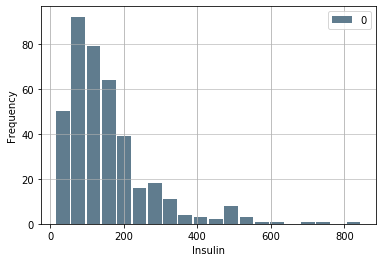

In [7]:
l = [x for x in df['Insulin'] if x > 0]
df2 = pd.DataFrame(l)
get['Insulin'] = stat(l)

m = [x for x in df['Insulin'] if x == 0]

plot1 = df2
plot1.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.xlabel('Insulin')
plt.grid(axis='y', alpha=0.75)

df2.describe()

# gaussian

As we can see from the histogram, we assume that the distribution is more or less a gaussian if half the rows with a value zero were inputted correctly. Thus, we impute the values based on the underlying gaussian distribution. 

6 . We plan to impute BMI values lower than 15 as on extensive reading we found that the lowest ever BMI value for a person was 13.6

count    757.000000
mean      31.711151
std        8.544789
min      -16.288921
25%       27.100000
50%       32.000000
75%       36.500000
max       67.100000
Name: BMI, dtype: float64

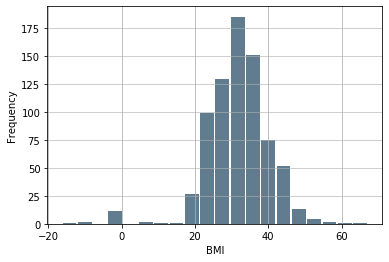

In [8]:
l = [x for x in df['BMI'] if x >=15]
get['BMI'] = stat(l)

plot1 = df['BMI']
plot1.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.xlabel('BMI')
plt.grid(axis='y', alpha=0.75)

df['BMI'].describe()
#remove below 15
#gaussian

As we can see from the histogram, the distribution is more or less a gaussian. Hence, we decided to impute missing values based on the corresponding gaussian

7 . No changes were made to the DiabetesPedigreeFunction values

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

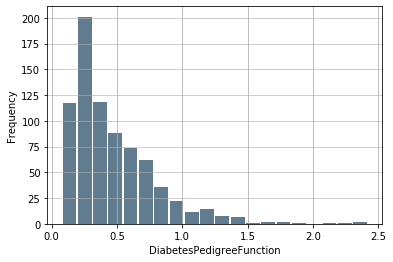

In [9]:
l = [x for x in df['DiabetesPedigreeFunction'] if x > 0]
get['DiabetesPedigreeFunction'] = stat(l)

plot1 = df['DiabetesPedigreeFunction']
plot1.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.xlabel('DiabetesPedigreeFunction')
plt.grid(axis='y', alpha=0.75)

df['DiabetesPedigreeFunction'].describe()

No imputation is required as there are no missing values.

8 . No changes were made to the Age values

count    749.000000
mean      33.761336
std       12.297409
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

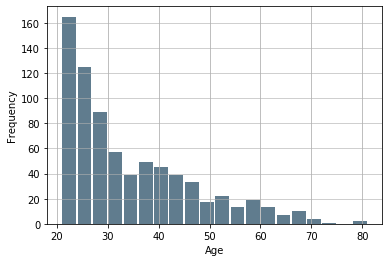

In [10]:
l = [x for x in df['Age'] if x > 0]
get['Age'] = stat(l)

plot1 = df['Age']
plot1.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.xlabel('Age')
plt.grid(axis='y', alpha=0.75)

df['Age'].describe()
#no change
#mean

Seeing the histogram, we have decided to impute missing values with the mean as it doesn't change the underlying distribution.

## 3. Exploratory Data Analysis

### Here we are computing the correlation matrix to see the inter dependencies between the attributes

In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='YlOrBr')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.0890994,0.122399,-0.0995139,-0.0969645,-0.0154301,-0.035988,0.461788,0.194147
Glucose,0.0890994,1,0.139863,0.0726417,0.329784,0.179681,0.124182,0.250379,0.469506
BloodPressure,0.122399,0.139863,1,0.207191,0.0891479,0.274645,0.0399594,0.231473,0.0628176
SkinThickness,-0.0995139,0.0726417,0.207191,1,0.43267,0.381212,0.183684,-0.126011,0.0853659
Insulin,-0.0969645,0.329784,0.0891479,0.43267,1,0.186688,0.185071,-0.0516003,0.130548
BMI,-0.0154301,0.179681,0.274645,0.381212,0.186688,1,0.145734,0.0209178,0.279651
DiabetesPedigreeFunction,-0.035988,0.124182,0.0399594,0.183684,0.185071,0.145734,1,0.0375535,0.173844
Age,0.461788,0.250379,0.231473,-0.126011,-0.0516003,0.0209178,0.0375535,1,0.216095
Outcome,0.194147,0.469506,0.0628176,0.0853659,0.130548,0.279651,0.173844,0.216095,1


### Here we are just separating out the correlation with respect to the 'Outcome' and sorting them in descending order

In [12]:
df.corr()['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.469506
BMI                         0.279651
Age                         0.216095
Pregnancies                 0.194147
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.085366
BloodPressure               0.062818
Name: Outcome, dtype: float64

From the above covariances, it is clear that 'BloodPressure' is related the least to 'Outcome'. Hence, we have decided to drop it from consideration and have updated the 'features' list in the first cell accordingly

As seen from the correlation matrix above, no absolute correlation value is greater than 0.5. Due to such low values, we didn't think that PCA would help in improving our model. To establish this, during experimentation, we tried applying PCA to reduce the dimensions to 4,6 and 8 dimensions and we got accuracies of less than 60%. Hence, we decided not to employ PCA after all. 

In [13]:
def PCA(feature,train,test):
    global df 
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    

    X_train = train.loc[:,feature]
    Y_train = train.loc[:,['Outcome']]
    X_test = test.loc[:,feature]
    Y_test = test.loc[:,['Outcome']]
    
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    
  
    noDimensions = 5
    pca = PCA(n_components = noDimensions)
    pca.fit(X_train)
    PC_train = pca.transform(X_train)
    PC_test = pca.transform(X_test)
    
    columns = ['principal components'+ str(i) for i in range(1,noDimensions+1)]
    X_train = pd.DataFrame(columns = columns, data = PC_train)
    X_test = pd.DataFrame(columns = columns, data = PC_test)
    final_train = X_train.copy(deep = True)
    final_train['Outcome'] = Y_train
    final_test = X_test.copy(deep = True)
    final_test['Outcome'] = Y_test
    return (final_train,final_test,columns)

We tried different methods,and many didn't work. In one of them, we tried plotting boxplots of different features vs outcome, and tried making certain observations. For example, take age vs outcome. We could see that 50% of people who had diabetes had an age greater than 32 and 25% of those who didn't have diabetes had an age greater than 32. Thus, we thought that there's a higher chance that someone has diabetes given that their age is greater than 32. Hence, we thought of adding a separate feature which was 1,if the age was >=32, and 0 if it was lesser than 32. However, probability doesn't work that way. P(Outcome | Age) is not P(Age | Outcome) and thus we removed changed our entire code. 

### This function alone performs all the data preprocessing for our dataset. The following changes to the dataset are made using this function:
* Null and negative values of pregnancies are imputed to the median which is 3
* Null and less than 15 values of BMI are imputed based on the corresponding gaussian
* Null and non-positive values of glucose are imputed based on the corresponding gaussian distribution
* Null and non-positive values of SkinThickness are imputed based on the corresponding gaussian distribution
* Null and non-positive values of Insulin are imputed based on the corresponding gaussian distribution and Insulin values are upper bounded to 420 as on extensive reading we found that anythin above this value would be fatal to health.
* Null and non-positive values of Age are imputed based on the corresponding gaussian distribution

In [14]:
def Process(feature):
    #Mean +- SD
    global df


    df['Pregnancies'].fillna(3,inplace = True)
    df['Pregnancies'].replace(df['Pregnancies']<0,3)
    
   
    df['BMI'].fillna(get['BMI'][0] + (random()*2-1)*get['BMI'][1],inplace = True)
    df['BMI'].replace(df['BMI'] <= 15,get['BMI'][0] + (random()*2-1)*get['BMI'][1])
    
   
    df['Glucose'].fillna(get['Glucose'][0] + (random()*2-1)*get['Glucose'][1],inplace = True)
    df['Glucose'].replace(df['Glucose'] <=0,get['Glucose'][0] + (random()*2-1)*get['Glucose'][1])
    
   
    df['SkinThickness'].fillna(get['SkinThickness'][0] + (random()*2-1)*get['SkinThickness'][1],inplace = True)
    df['SkinThickness'].replace(df['SkinThickness'] <= 0,get['SkinThickness'][0] + (random()*2-1)*get['SkinThickness'][1])
    
   
    df.Insulin = [min(x,420) for x in list(df.Insulin)]
    df['Insulin'].fillna(get['Insulin'][0] + (random()*2-1)*get['Insulin'][1],inplace = True)
    df['Insulin'].replace(df['Insulin'] <= 0,get['Insulin'][0] + (random()*2-1)*get['Insulin'][1])
    
   
    df['Age'].fillna(get['Age'][0] + (random()*2-1)*get['Age'][1],inplace = True)
    df['Age'].replace(df['Age'] <= 0,get['Age'][0])

   
    return df

In [15]:
def printConfusionMatrix(X_test, Y_test, logreg, score):
    Y_pred = logreg.predict(X_test)
    cm = metrics.confusion_matrix(Y_test,Y_pred)

    plt.figure(figsize=(12,12))
    sns.heatmap(cm, annot=True, fmt=".3f", center=True,linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)

    plt.show()  

## 4. Model Building

We decided to go ahead with logistic regression as it's an appropriate method to go ahead with when the dependent variable is dichotmous.

In [16]:
def Log1(feature,k,boo):
    df = Process(feature)

    df_train,df_test = train_test_split(df,random_state = k)

    X_train,Y_train,X_test,Y_test = df_train[feature],df_train['Outcome'],df_test[feature],df_test['Outcome']

    logreg = LogisticRegression(solver='liblinear')
    logreg.fit(X_train,Y_train)
    score_test = logreg.score(X_test,Y_test)
    score_training = logreg.score(X_train,Y_train)
    
    #If we want to see the confusion matrix
    if(boo):
        printConfusionMatrix(X_test, Y_test, logreg, score_test)

    return (score_test,score_training)

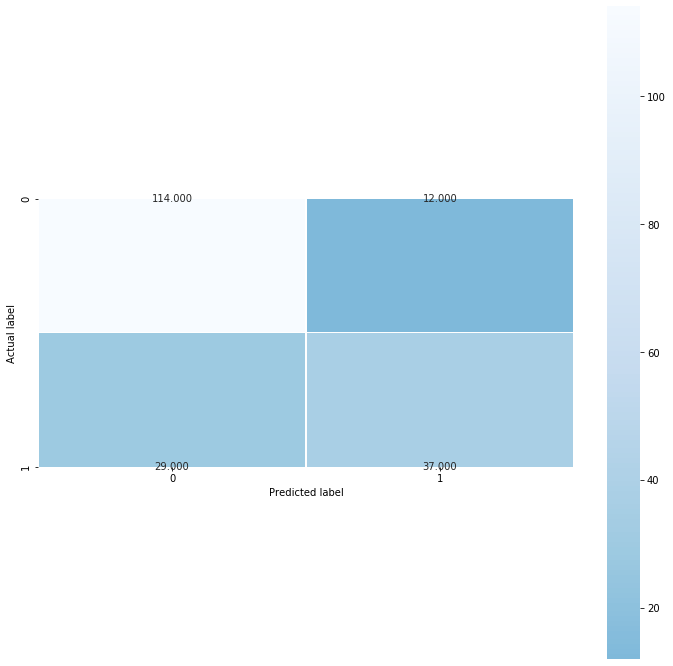

Test score : 0.7864583333333334 
Training score : 0.7708333333333334


In [17]:
t = Log1(feature,10999,True)
print ("Test score :",t[0],"\nTraining score :",t[1])

We run logistic regression 100 times, and note the distribution of accuracies we get. We've also calculated the max, min and mean of the accuracies. The loop takes a long time to run ( ~ 10 minutes), but it's a good measure to see how good the model is.

In [ ]:
l = []
m = []
max1,max2 = -1,-1
min1,min2 = 1e9,1e9

for i in range(1,101):
    t = Log1(feature,i,False)
    l.append(t[0])
    m.append(t[1])


In [ ]:
print("Test-> mean =",sum(l)/len(l)," min =",min(l)," max =",max(l))
print("Training-> mean =",sum(m)/len(m)," min =",min(m)," max =",max(m))
l1 = pd.DataFrame(l)
print(l1.plot.hist())